**INSTALL PACKAGES AND IMPORT THEM**

In [4]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
from sklearn.utils.validation import column_or_1d
from sklearn.feature_selection import VarianceThreshold
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn as sk                        # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
%matplotlib inline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix

**LOAD DATA**

In [5]:
def load_data():
  global df
  try: 
    df = pd.read_csv("../src/preprocessed.csv")
  except FileNotFoundError:
    from google.colab import drive
    drive.mount('/content/drive')
    df=pd.read_csv('/content/drive/MyDrive/MD/Laboratori/Practica 2/data/smoking.csv')

In [6]:
load_data()

In [7]:
df.head()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp,dental caries,tartar,smoking
0,40,155,60,1.2,1.0,1.0,1.0,114.0,94.0,215.0,82.0,73.0,12.9,1.0,0.7,19.0,27.0,False,True,False
1,40,160,60,0.8,0.6,1.0,1.0,119.0,130.0,192.0,115.0,42.0,12.7,1.0,0.6,19.0,18.0,False,True,False
2,55,170,60,0.8,0.8,1.0,1.0,138.0,89.0,242.0,182.0,55.0,15.8,1.0,1.0,16.0,22.0,False,False,True
3,40,165,70,1.5,1.5,1.0,1.0,100.0,96.0,322.0,254.0,45.0,14.7,1.0,1.0,26.0,18.0,False,True,False
4,40,155,60,1.0,1.0,1.0,1.0,120.0,80.0,184.0,74.0,62.0,12.5,1.0,0.6,14.0,22.0,False,False,False


**Normalisation of data**

In [8]:
df.describe()

,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,fasting blood sugar,Cholesterol,triglyceride,HDL,hemoglobin,Urine protein,serum creatinine,ALT,Gtp
count,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000,53956.000000
mean,43.239306,164.884628,66.073282,1.021260,1.016777,1.019442,1.019998,121.204259,99.076118,197.295982,126.902254,57.358885,14.641085,1.085996,0.884039,27.197883,40.092112
std,11.016945,9.123537,12.866585,0.465187,0.472137,0.138073,0.139994,13.542347,20.673482,36.166005,71.961424,14.764334,1.566888,0.399633,0.216193,31.352849,50.375825
min,20.000000,135.000000,30.000000,0.100000,0.100000,1.000000,1.000000,71.000000,46.000000,55.000000,8.000000,4.000000,4.900000,1.000000,0.100000,1.000000,1.000000
25%,35.000000,160.000000,55.000000,0.800000,0.800000,1.000000,1.000000,112.000000,89.000000,172.000000,74.000000,47.000000,13.600000,1.000000,0.800000,15.000000,17.000000
50%,40.000000,165.000000,65.000000,1.000000,1.000000,1.000000,1.000000,120.000000,95.000000,195.000000,108.000000,55.000000,14.800000,1.000000,0.900000,21.000000,26.000000
75%,50.000000,170.000000,75.000000,1.200000,1.200000,1.000000,1.000000,130.000000,103.000000,220.000000,160.000000,66.000000,15.800000,1.000000,1.000000,31.000000,44.000000
max,65.000000,190.000000,135.000000,9.900000,9.900000,2.000000,2.000000,240.000000,505.000000,445.000000,999.000000,618.000000,21.100000,6.000000,11.600000,2914.000000,999.000000


In [9]:
# In order to apply SVM, we need our data to be numerical and normalised
from sklearn.preprocessing import MinMaxScaler

# Transform boolean types into numerical
df['dental caries'] = df['dental caries'].astype(int)
df['tartar'] = df['tartar'].astype(int)
df['smoking'] = df['smoking'].astype(int)

# Spliting dataset into train and test
from sklearn.model_selection import train_test_split
X = df.drop(columns=['smoking'], axis=1)
y = df['smoking']
X_train, X_test, y_train, y_test = cv.train_test_split(X, y, test_size=.3, stratify = y,random_state=1)

# Normalisation 
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
ALT                    float64
Gtp                    float64
dental caries            int64
tartar                   int64
smoking                  int64
dtype: object

**UTILS**

In [10]:
from IPython.display import display, HTML

def reportClassesDataframe(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

def reportAccuracyDF(report):
  report = [x.split('      ') for x in report.split('\n')]
  values = []
  report[6].pop(2)
  df = pd.DataFrame(report[6:9])
  return df

def prettyReport(report):
    df = reportClassesDataframe(report)
    display(HTML(df.to_html(index=False,justify="center")))
    df2 = reportAccuracyDF(report)
    df2 = df2.iloc[[0,1],[0,1,2]]
    print("\n")
    display(HTML(df2.to_html( header=False,index=False,justify="center")))
    df
    df2
    return

def  prettyConfusionMatrix(confmat):
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

  plt.xlabel('Predicted label')
  plt.ylabel('True label')

  plt.tight_layout()
  plt.savefig('ConMatrix.png', dpi=600)
  plt.show()
  return


def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

**Polynomial kernels**

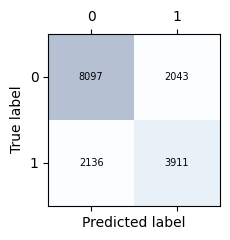

Confusion matrix on test set:
 None

Accuracy on test set:  0.7418298634706864


Class Name,precision,recall,f1-score,support
0,0.79,0.80,0.79,10140
1,0.66,0.65,0.65,6047


macro avg,0.72,0.72 16187
weighted avg,0.74,0.74


None


In [18]:
knc = SVC(kernel='poly', degree=2)
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",prettyConfusionMatrix(confusion_matrix(y_test, pred)))
print("\nAccuracy on test set: ",accuracy_score(y_test, pred))
print(prettyReport(classification_report(y_test, pred)))

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Con

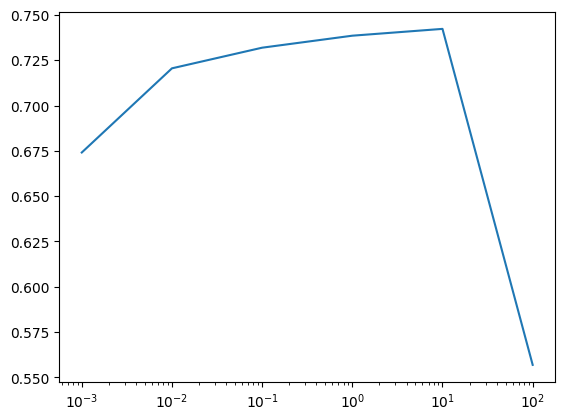

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Con

Acc. 10-fold cross on train data=  0.7422755033813042


NameError: name 'sk' is not defined

In [21]:
Cs = np.logspace(-3, 2, num=6, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =2, max_iter=20000) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =2,C=parval['C'], max_iter=20000) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =2,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)


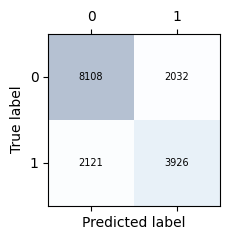

Confusion matrix on test set:
 None

Accuracy on test set:  0.7434360906900599

Best combination of parameters found:  {'C': 10.0}

Number of supports:  22063 ( 21896 of them have slacks)
Prop. of supports:  0.5841563186740448


Class Name,precision,recall,f1-score,support
0,0.79,0.80,0.80,10140
1,0.66,0.65,0.65,6047


macro avg,0.73,0.73 16187
weighted avg,0.74,0.74


None


In [26]:
print("Confusion matrix on test set:\n",prettyConfusionMatrix(confusion_matrix(y_test, pred)))
print("\nAccuracy on test set: ", sk.metrics.accuracy_score(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])
print(prettyReport(classification_report(y_test, pred)))



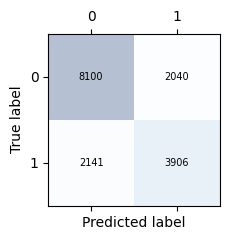

Confusion matrix on test set:
 None

Accuracy on test set:  0.7417063075307345


Class Name,precision,recall,f1-score,support
0,0.79,0.80,0.79,10140
1,0.66,0.65,0.65,6047


macro avg,0.72,0.72 16187
weighted avg,0.74,0.74


None


In [19]:
knc = SVC(kernel='poly', degree=3)
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",prettyConfusionMatrix(confusion_matrix(y_test, pred)))
print("\nAccuracy on test set: ",accuracy_score(y_test, pred))
print(prettyReport(classification_report(y_test, pred)))

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Con

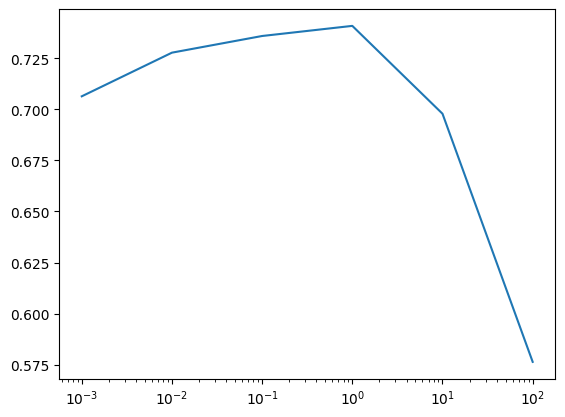

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20000).  Con

Acc. 10-fold cross on train data=  0.7408191599579075


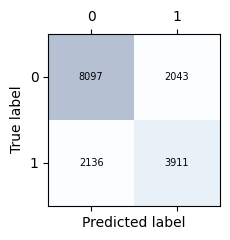

Confusion matrix on test set:
 None

Accuracy on test set:  0.7418298634706864


Class Name,precision,recall,f1-score,support
0,0.79,0.80,0.79,10140
1,0.66,0.65,0.65,6047


macro avg,0.72,0.72 16187
weighted avg,0.74,0.74


None

Best combination of parameters found:  {'C': 1.0}

Number of supports:  22490 ( 22374 of them have slacks)
Prop. of supports:  0.5954618867325054


In [11]:
Cs = np.logspace(-3, 2, num=6, base=10.0)
param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =3, max_iter=20000) , param_grid, cv=10)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C'], max_iter=20000) , X=X_train,  y=y_train, cv=10, scoring='accuracy')
print('Acc. 10-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =2,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",prettyConfusionMatrix(confusion_matrix(y_test, pred)))
print("\nAccuracy on test set: ",accuracy_score(y_test, pred))
print(prettyReport(classification_report(y_test, pred)))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])